# CPU-Scheduling Algorithm Evaluation

Bench-test *FCFS*, *SJF*, *Static Priority*, *Round-Robin* and *Priority + RR* on a baseline
workload **plus seven edge-case workloads** (same-arrival, same-priority, same-burst, etc.).

Outputs:
* Key KPIs in stdout
* Inline Gantt charts (matplotlib)
* `summary` dict with every KPI → ready for CSV / Pandas / LaTeX table


## 1 · Imports & path tweak

In [2]:
import sys, copy
from typing import List
import matplotlib.pyplot as plt

# path to *your* scheduler package
sys.path.append("../OS-Assign-1-CC")

from ProcessClass.process         import Process
from schedulers.FCFS              import FCFSScheduler
from schedulers.SJF               import SJFScheduler
from schedulers.PrioritySchedule  import PriorityScheduler
from schedulers.RR                import RoundRobinScheduler
from schedulers.RR_Priority       import PriorityRoundRobinScheduler


## 2 · Synthetic-process generators

In [3]:
# -- baseline demo workload --
def generate_sample_processes():
    return [
        Process(id=1, burst_time=5, priority=2, arrival_time=0),
        Process(id=2, burst_time=3, priority=1, arrival_time=2),
        Process(id=3, burst_time=8, priority=4, arrival_time=4),
        Process(id=4, burst_time=6, priority=3, arrival_time=6),
    ]

# -- edge-case workloads --
def generate_edge_case_same_arrival():
    return [
        Process(1, 10, 2, 0), Process(2, 1, 1, 0), Process(3, 2, 4, 0), Process(4, 1, 3, 0)
    ]

def generate_edge_case_same_priority():
    return [
        Process(1, 4, 1, 0), Process(2, 6, 1, 2), Process(3, 5, 1, 4), Process(4, 3, 1, 6)
    ]

def generate_edge_case_same_burst():
    return [
        Process(10, 4, 5, 0), Process(11, 4, 1, 1), Process(12, 4, 3, 2)
    ]

def generate_edge_case_reverse_priority():
    return [
        Process(21, 15, 5, 0), Process(22, 3, 1, 5), Process(23, 2, 2, 6)
    ]

def generate_edge_case_sparse_arrivals():
    return [
        Process(31, 2, 2, 0), Process(32, 3, 3, 20), Process(33, 1, 1, 40)
    ]

def generate_edge_case_long_idle():
    return [
        Process(41, 5, 2, 10), Process(42, 3, 3, 12)
    ]


## 3 · Scheduler runner + tiny Gantt helper

In [4]:
def run_scheduler(label, scheduler_cls, procs, **kwargs):
    print(f"\n▶▶ {label}")
    s = scheduler_cls(copy.deepcopy(procs), **kwargs) if kwargs else scheduler_cls(copy.deepcopy(procs))
    s.run()
    stats = s.get_statistics()
    for k in (
        "avg_waiting_time",
        "avg_turnaround_time",
        "avg_response_time",
        "total_execution_time",
        "throughput",
    ):
        print(f"  {k.replace('_', ' ').title():22}: {stats.get(k, 'n/a')}")

    fig, ax = plt.subplots(figsize=(9, 1))
    for pid, start, end in s.gantt_chart:
        ax.barh(0, end - start, left = start, height = 0.5)
        ax.text(start + 0.1, 0, f"P{pid}" if pid != 'IDLE' else 'IDLE', va = 'center', fontsize = 8, color = 'w')
    ax.set_yticks([])
    ax.set_xlim(0, s.current_time)
    ax.set_title(label)
    plt.show()
    return stats


## 4 · Scheduler registry  *(edit quantum here if you like)*

In [5]:
schedulers = [
    ("FCFS",          FCFSScheduler,               {}),
    ("SJF",           SJFScheduler,                {}),
    ("Priority",      PriorityScheduler,           {}),
    ("Round Robin",   RoundRobinScheduler,         {"time_quantum": 3}),
    ("Priority + RR", PriorityRoundRobinScheduler, {"time_quantum": 3})
]


## 5 · Baseline workload


▶▶ FCFS
  Avg Waiting Time      : 4.25
  Avg Turnaround Time   : 9.75
  Avg Response Time     : 4.25
  Total Execution Time  : 22
  Throughput            : 0.18181818181818182


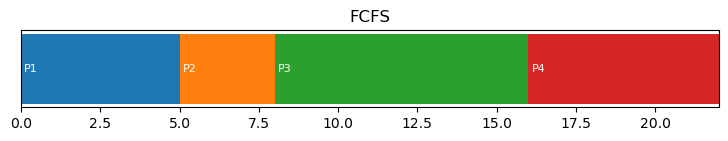


▶▶ SJF
  Avg Waiting Time      : 3.75
  Avg Turnaround Time   : 9.25
  Avg Response Time     : 3.75
  Total Execution Time  : 22
  Throughput            : 0.18181818181818182


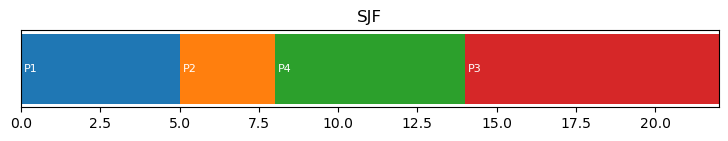


▶▶ Priority
  Avg Waiting Time      : 3.75
  Avg Turnaround Time   : 9.25
  Avg Response Time     : 3.75
  Total Execution Time  : 22
  Throughput            : 0.18181818181818182


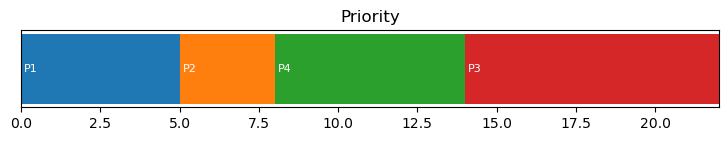


▶▶ Round Robin
  Avg Waiting Time      : 3.0
  Avg Turnaround Time   : 11.0
  Avg Response Time     : 2.5
  Total Execution Time  : 22
  Throughput            : 0.18181818181818182


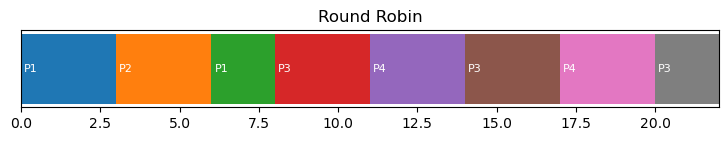


▶▶ Priority + RR
  Avg Waiting Time      : 0.75
  Avg Turnaround Time   : 9.5
  Avg Response Time     : 3.25
  Total Execution Time  : 22
  Throughput            : 0.18181818181818182


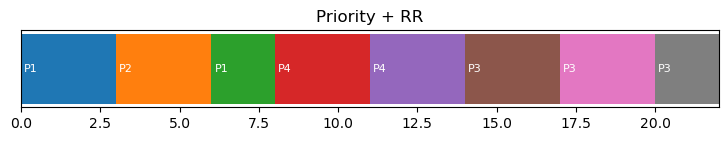

In [6]:
baseline = generate_sample_processes()
for name, cls, kw in schedulers:
    run_scheduler(name, cls, baseline, **kw)


## 6 · Edge-case workload battery



#### Edge-case: Same Arrival
----------------------------------------

▶▶ FCFS  –  Same Arrival
  Avg Waiting Time      : 8.5
  Avg Turnaround Time   : 12.0
  Avg Response Time     : 8.5
  Total Execution Time  : 14
  Throughput            : 0.2857142857142857


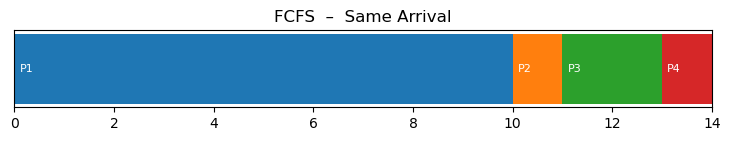


▶▶ SJF  –  Same Arrival
  Avg Waiting Time      : 1.75
  Avg Turnaround Time   : 5.25
  Avg Response Time     : 1.75
  Total Execution Time  : 14
  Throughput            : 0.2857142857142857


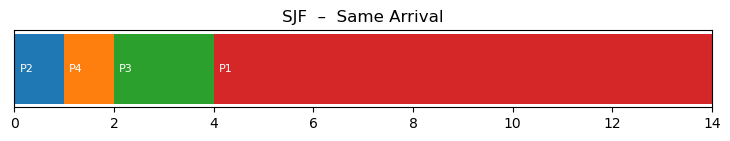


▶▶ Priority  –  Same Arrival
  Avg Waiting Time      : 6.0
  Avg Turnaround Time   : 9.5
  Avg Response Time     : 6.0
  Total Execution Time  : 14
  Throughput            : 0.2857142857142857


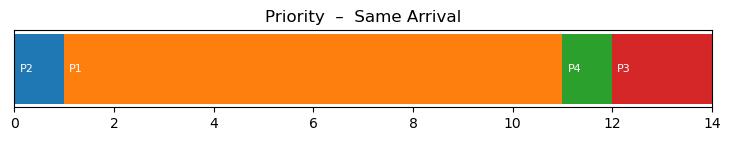


▶▶ Round Robin  –  Same Arrival
  Avg Waiting Time      : 0.0
  Avg Turnaround Time   : 4.5
  Avg Response Time     : 1.0
  Total Execution Time  : 10
  Throughput            : 0.4


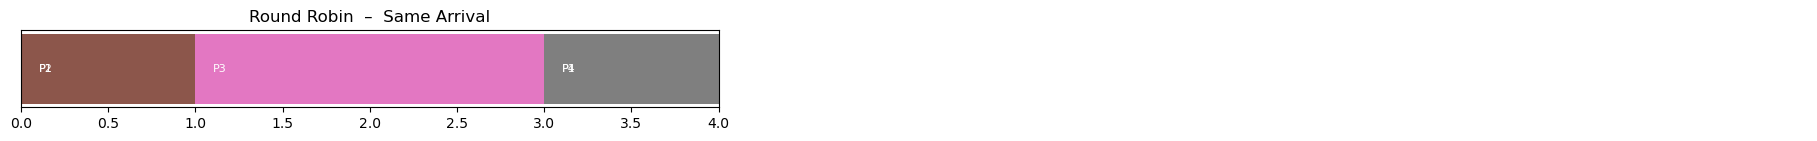


▶▶ Priority + RR  –  Same Arrival
  Avg Waiting Time      : 0.0
  Avg Turnaround Time   : 4.25
  Avg Response Time     : 0.75
  Total Execution Time  : 10
  Throughput            : 0.4


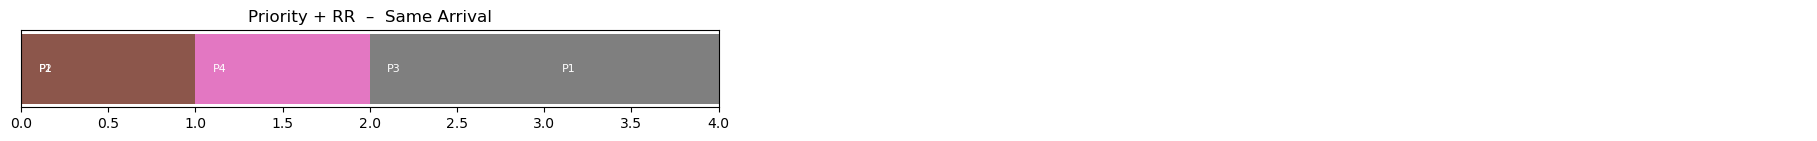



#### Edge-case: Same Priority
----------------------------------------

▶▶ FCFS  –  Same Priority
  Avg Waiting Time      : 4.25
  Avg Turnaround Time   : 8.75
  Avg Response Time     : 4.25
  Total Execution Time  : 18
  Throughput            : 0.2222222222222222


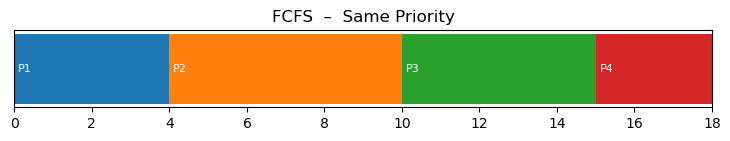


▶▶ SJF  –  Same Priority
  Avg Waiting Time      : 3.25
  Avg Turnaround Time   : 7.75
  Avg Response Time     : 3.25
  Total Execution Time  : 18
  Throughput            : 0.2222222222222222


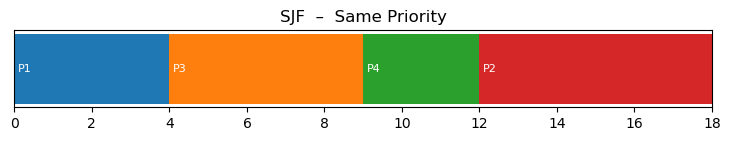


▶▶ Priority  –  Same Priority
  Avg Waiting Time      : 4.25
  Avg Turnaround Time   : 8.75
  Avg Response Time     : 4.25
  Total Execution Time  : 18
  Throughput            : 0.2222222222222222


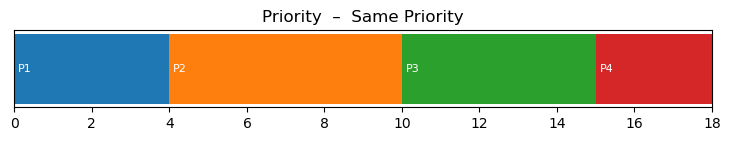


▶▶ Round Robin  –  Same Priority
  Avg Waiting Time      : 4.0
  Avg Turnaround Time   : 10.5
  Avg Response Time     : 2.0
  Total Execution Time  : 18
  Throughput            : 0.2222222222222222


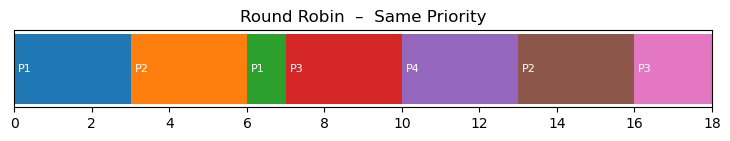


▶▶ Priority + RR  –  Same Priority
  Avg Waiting Time      : 4.0
  Avg Turnaround Time   : 10.5
  Avg Response Time     : 2.0
  Total Execution Time  : 18
  Throughput            : 0.2222222222222222


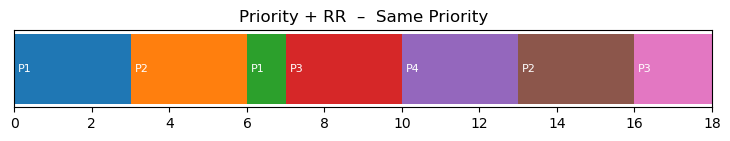



#### Edge-case: Same Burst
----------------------------------------

▶▶ FCFS  –  Same Burst
  Avg Waiting Time      : 3.0
  Avg Turnaround Time   : 7.0
  Avg Response Time     : 3.0
  Total Execution Time  : 12
  Throughput            : 0.25


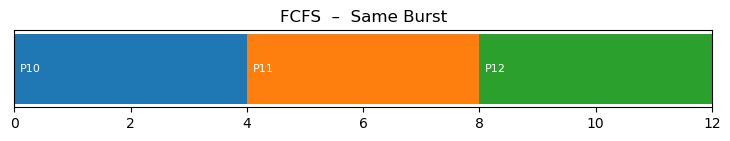


▶▶ SJF  –  Same Burst
  Avg Waiting Time      : 3.0
  Avg Turnaround Time   : 7.0
  Avg Response Time     : 3.0
  Total Execution Time  : 12
  Throughput            : 0.25


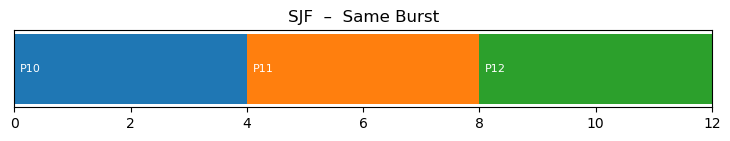


▶▶ Priority  –  Same Burst
  Avg Waiting Time      : 3.0
  Avg Turnaround Time   : 7.0
  Avg Response Time     : 3.0
  Total Execution Time  : 12
  Throughput            : 0.25


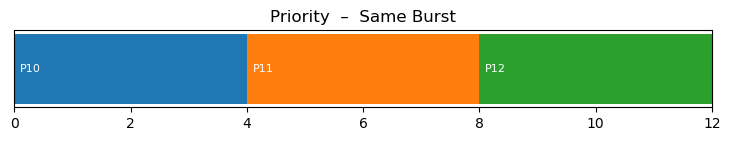


▶▶ Round Robin  –  Same Burst
  Avg Waiting Time      : 4.0
  Avg Turnaround Time   : 10.0
  Avg Response Time     : 2.0
  Total Execution Time  : 12
  Throughput            : 0.25


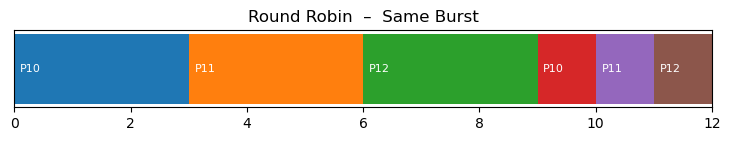


▶▶ Priority + RR  –  Same Burst
  Avg Waiting Time      : 2.6666666666666665
  Avg Turnaround Time   : 9.0
  Avg Response Time     : 2.3333333333333335
  Total Execution Time  : 12
  Throughput            : 0.25


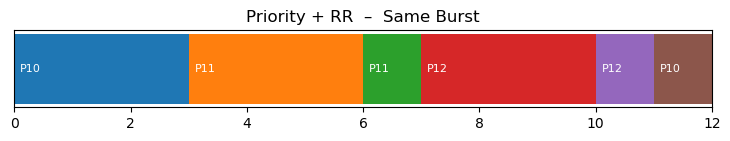



#### Edge-case: Reverse Priority
----------------------------------------

▶▶ FCFS  –  Reverse Priority
  Avg Waiting Time      : 7.333333333333333
  Avg Turnaround Time   : 14.0
  Avg Response Time     : 7.333333333333333
  Total Execution Time  : 20
  Throughput            : 0.15


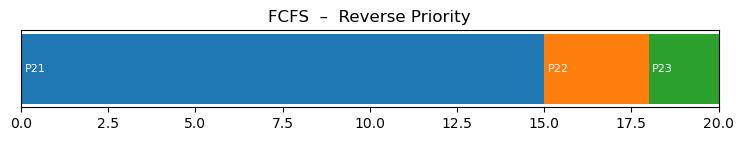


▶▶ SJF  –  Reverse Priority
  Avg Waiting Time      : 7.0
  Avg Turnaround Time   : 13.666666666666666
  Avg Response Time     : 7.0
  Total Execution Time  : 20
  Throughput            : 0.15


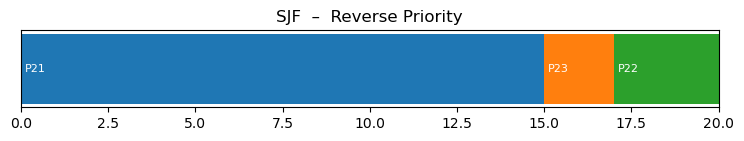


▶▶ Priority  –  Reverse Priority
  Avg Waiting Time      : 7.333333333333333
  Avg Turnaround Time   : 14.0
  Avg Response Time     : 7.333333333333333
  Total Execution Time  : 20
  Throughput            : 0.15


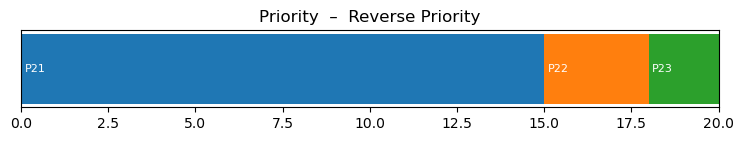


▶▶ Round Robin  –  Reverse Priority
  Avg Waiting Time      : 1.6666666666666667
  Avg Turnaround Time   : 9.666666666666666
  Avg Response Time     : 1.3333333333333333
  Total Execution Time  : 20
  Throughput            : 0.15


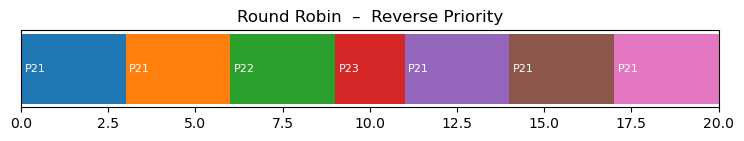


▶▶ Priority + RR  –  Reverse Priority
  Avg Waiting Time      : 1.6666666666666667
  Avg Turnaround Time   : 9.666666666666666
  Avg Response Time     : 1.3333333333333333
  Total Execution Time  : 20
  Throughput            : 0.15


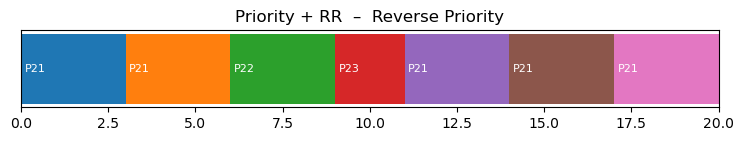



#### Edge-case: Sparse Arrivals
----------------------------------------

▶▶ FCFS  –  Sparse Arrivals
  Avg Waiting Time      : 0.0
  Avg Turnaround Time   : 2.0
  Avg Response Time     : 0.0
  Total Execution Time  : 41
  Throughput            : 0.07317073170731707


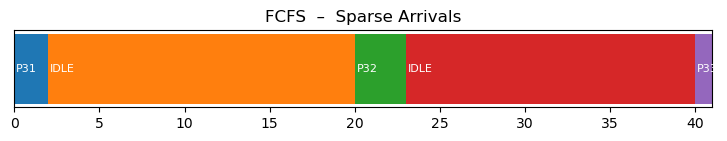


▶▶ SJF  –  Sparse Arrivals
  Avg Waiting Time      : 0.0
  Avg Turnaround Time   : 2.0
  Avg Response Time     : 0.0
  Total Execution Time  : 41
  Throughput            : 0.07317073170731707


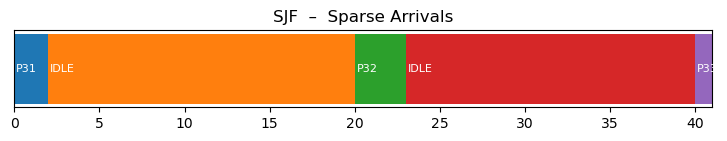


▶▶ Priority  –  Sparse Arrivals
  Avg Waiting Time      : 0.0
  Avg Turnaround Time   : 2.0
  Avg Response Time     : 0.0
  Total Execution Time  : 41
  Throughput            : 0.07317073170731707


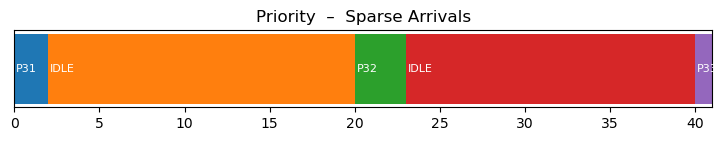


▶▶ Round Robin  –  Sparse Arrivals
  Avg Waiting Time      : 0.0
  Avg Turnaround Time   : 2.0
  Avg Response Time     : 0.0
  Total Execution Time  : 41
  Throughput            : 0.07317073170731707


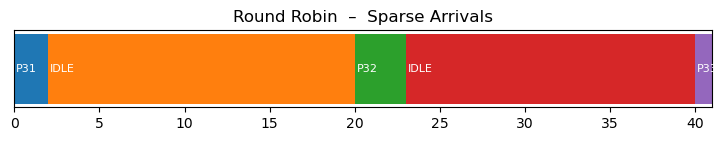


▶▶ Priority + RR  –  Sparse Arrivals
  Avg Waiting Time      : 0.0
  Avg Turnaround Time   : 2.0
  Avg Response Time     : 0.0
  Total Execution Time  : 41
  Throughput            : 0.07317073170731707


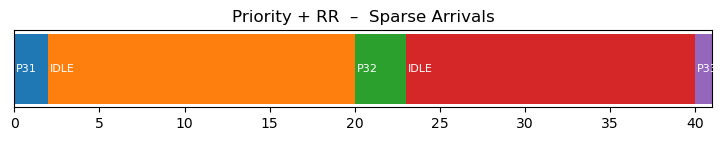



#### Edge-case: Long Initial Idle
----------------------------------------

▶▶ FCFS  –  Long Initial Idle
  Avg Waiting Time      : 1.5
  Avg Turnaround Time   : 5.5
  Avg Response Time     : 1.5
  Total Execution Time  : 8
  Throughput            : 0.25


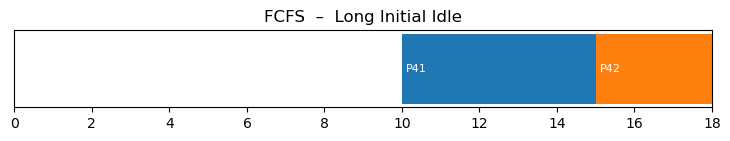


▶▶ SJF  –  Long Initial Idle
  Avg Waiting Time      : 1.5
  Avg Turnaround Time   : 5.5
  Avg Response Time     : 1.5
  Total Execution Time  : 8
  Throughput            : 0.25


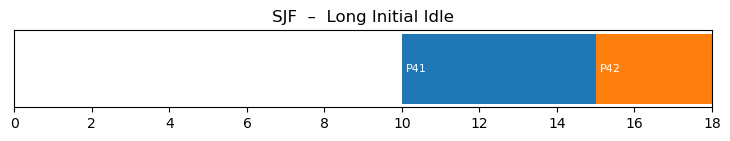


▶▶ Priority  –  Long Initial Idle
  Avg Waiting Time      : 1.5
  Avg Turnaround Time   : 5.5
  Avg Response Time     : 1.5
  Total Execution Time  : 8
  Throughput            : 0.25


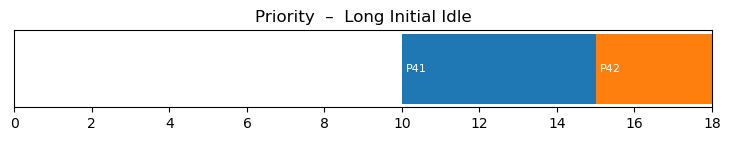


▶▶ Round Robin  –  Long Initial Idle
  Avg Waiting Time      : 1.5
  Avg Turnaround Time   : 6.0
  Avg Response Time     : 0.5
  Total Execution Time  : 8
  Throughput            : 0.25


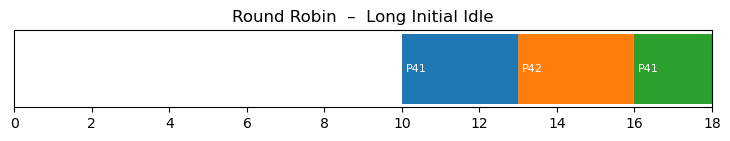


▶▶ Priority + RR  –  Long Initial Idle
  Avg Waiting Time      : 0.0
  Avg Turnaround Time   : 5.5
  Avg Response Time     : 1.5
  Total Execution Time  : 8
  Throughput            : 0.25


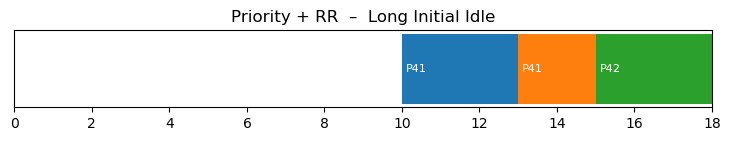

In [7]:
edge_cases = {
    "Same Arrival":      generate_edge_case_same_arrival(),
    "Same Priority":     generate_edge_case_same_priority(),
    "Same Burst":        generate_edge_case_same_burst(),
    "Reverse Priority":  generate_edge_case_reverse_priority(),
    "Sparse Arrivals":   generate_edge_case_sparse_arrivals(),
    "Long Initial Idle": generate_edge_case_long_idle()
}

summary = {}
for ec_name, plist in edge_cases.items():
    print(f"\n\n#### Edge-case: {ec_name}\n" + "-" * 40)
    summary[ec_name] = {}
    for sched_name, cls, kw in schedulers:
        summary[ec_name][sched_name] = run_scheduler(
            f"{sched_name}  –  {ec_name}", cls, plist, **kw
        )


### 7 · Next steps

`summary` is a two-level dict (`edge_case → scheduler → KPI-dict`).  
Dump to CSV, Pandas, Excel, LaTeX — whatever you need.